In [80]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import geopandas as gpd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from time import strptime
import os 
import patsy 
from shapely.wkt import loads
import pickle
from sklearn.preprocessing import StandardScaler
import re
from sklearn.decomposition import PCA

In [31]:
#CINCINcountMedicalFacilitiesCinbyTract--the new tracts
#CINCINcountMedicalFacilitiesWithin2milesCinbyTract_v2.pkl--the new centroid counts without duplicates
pkl_in_Cin = open('CINCINcountMedicalFacilitiesWithin2milesCinbyTract_v2.pkl', 'rb')

fac = pickle.load(pkl_in_Cin)

fac.head()

,TractNumber,HospitalsGeneralCount2mi,HospitalsPsychCount2mi,SurgicalCentersCount2mi,UrgentCareCount2mi,WomensClinicsCount2mi,PainManagementCount2mi,PhysicalTherapyCount2mi,MentalFacilitiesCount2mi,SubstanceAbuseCount2mi,OtherMedicalFacilitesCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,HospitalsChildCount2mi,ChildFacilitiesCount2mi,PharmCount2mi,DrugDropCount2mi,NaloxoneDistribCount2mi,geometry
0,45.00,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,"MULTIPOLYGON (((-84.41979 39.08133, -84.41974 ..."
1,46.02,0,0,0,1,1,0,0,0,0,1,5,0,0,0,4,0,0,"MULTIPOLYGON (((-84.37076 39.08596, -84.37075 ..."
2,46.03,1,0,2,1,1,2,0,1,0,5,5,1,0,0,6,0,2,"POLYGON ((-84.37590 39.08449, -84.37566 39.084..."
3,46.05,0,0,0,0,0,0,0,0,0,4,4,0,0,0,2,0,5,"MULTIPOLYGON (((-84.38695 39.10141, -84.38690 ..."
4,46.04,0,0,0,0,1,0,0,0,0,1,5,0,0,0,3,0,0,"POLYGON ((-84.37198 39.09470, -84.37240 39.094..."


In [6]:
exp=fac.drop(columns=['geometry'])
exp.head()

,TractNumber,HospitalsGeneralCount2mi,HospitalsPsychCount2mi,SurgicalCentersCount2mi,UrgentCareCount2mi,WomensClinicsCount2mi,PainManagementCount2mi,PhysicalTherapyCount2mi,MentalFacilitiesCount2mi,SubstanceAbuseCount2mi,OtherMedicalFacilitesCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,HospitalsChildCount2mi,ChildFacilitiesCount2mi,PharmCount2mi,DrugDropCount2mi,NaloxoneDistribCount2mi
0,45.00,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0
1,46.02,0,0,0,1,1,0,0,0,0,1,5,0,0,0,4,0,0
2,46.03,1,0,2,1,1,2,0,1,0,5,5,1,0,0,6,0,2
3,46.05,0,0,0,0,0,0,0,0,0,4,4,0,0,0,2,0,5
4,46.04,0,0,0,0,1,0,0,0,0,1,5,0,0,0,3,0,0


In [8]:
exp.corr()

,HospitalsGeneralCount2mi,HospitalsPsychCount2mi,SurgicalCentersCount2mi,UrgentCareCount2mi,WomensClinicsCount2mi,PainManagementCount2mi,PhysicalTherapyCount2mi,MentalFacilitiesCount2mi,SubstanceAbuseCount2mi,OtherMedicalFacilitesCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,HospitalsChildCount2mi,ChildFacilitiesCount2mi,PharmCount2mi,DrugDropCount2mi,NaloxoneDistribCount2mi
HospitalsGeneralCount2mi,1.000000,-0.079416,0.555766,0.257012,0.797976,0.513189,0.687529,0.874012,0.898036,0.875890,0.319830,0.245785,0.880226,0.104747,0.810710,0.542991,0.699689
HospitalsPsychCount2mi,-0.079416,1.000000,0.264444,0.377856,-0.330565,-0.067111,0.105663,-0.176949,-0.290281,-0.204082,0.119348,0.438648,-0.258616,-0.136509,-0.164610,-0.377192,-0.143748
SurgicalCentersCount2mi,0.555766,0.264444,1.000000,0.663152,0.236254,0.292214,0.686922,0.546115,0.467520,0.447242,0.429041,0.392570,0.489811,-0.075471,0.430478,0.085233,0.422952
UrgentCareCount2mi,0.257012,0.377856,0.663152,1.000000,-0.015517,0.394732,0.590394,0.179339,0.179768,0.208102,0.347748,0.323063,0.094144,0.020584,0.431761,-0.044439,0.342364
WomensClinicsCount2mi,0.797976,-0.330565,0.236254,-0.015517,1.000000,0.507530,0.511073,0.742627,0.813868,0.871149,0.082741,0.035406,0.698396,0.282547,0.714608,0.564804,0.675585
PainManagementCount2mi,0.513189,-0.067111,0.292214,0.394732,0.507530,1.000000,0.559559,0.552555,0.587621,0.669562,-0.047995,0.322916,0.339724,0.476343,0.656056,0.478847,0.369577
PhysicalTherapyCount2mi,0.687529,0.105663,0.686922,0.590394,0.511073,0.559559,1.000000,0.662596,0.715569,0.650276,0.424852,0.246757,0.641383,-0.034093,0.665796,0.355264,0.544984
MentalFacilitiesCount2mi,0.874012,-0.176949,0.546115,0.179339,0.742627,0.552555,0.662596,1.000000,0.912303,0.860609,0.246089,0.188204,0.858637,0.230739,0.748205,0.602362,0.563312
SubstanceAbuseCount2mi,0.898036,-0.290281,0.467520,0.179768,0.813868,0.587621,0.715569,0.912303,1.000000,0.915115,0.215616,0.113323,0.885999,0.226966,0.845603,0.678077,0.625209
OtherMedicalFacilitesCount2mi,0.875890,-0.204082,0.447242,0.208102,0.871149,0.669562,0.650276,0.860609,0.915115,1.000000,0.072610,0.260768,0.757482,0.402266,0.829959,0.602777,0.756935


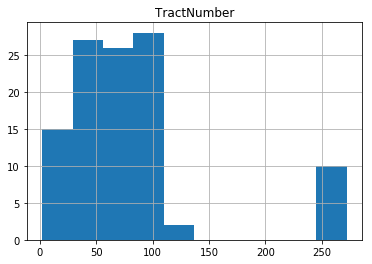

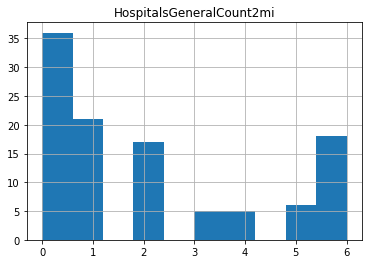

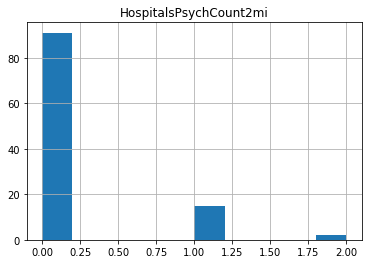

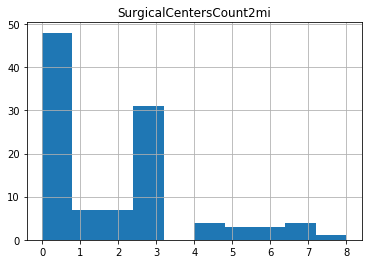

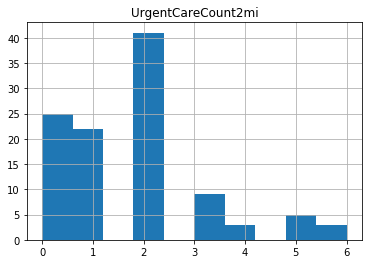

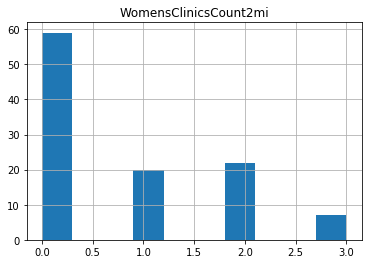

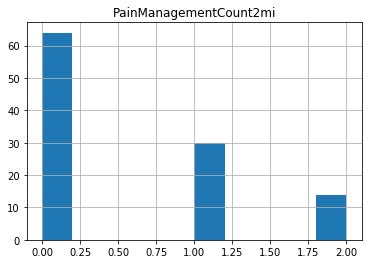

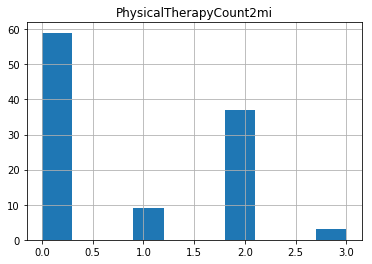

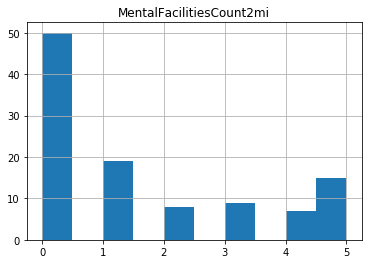

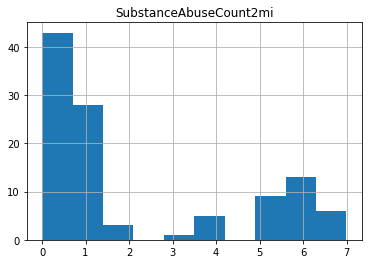

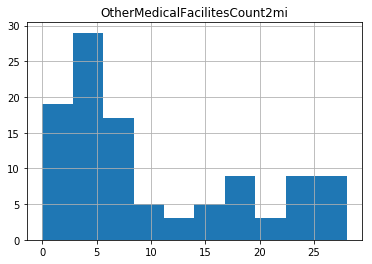

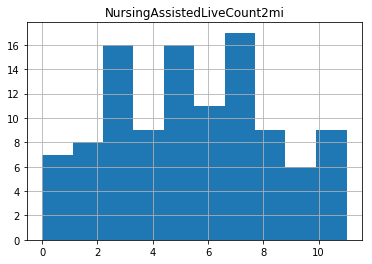

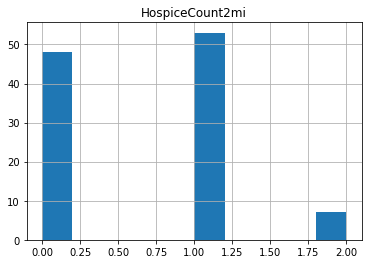

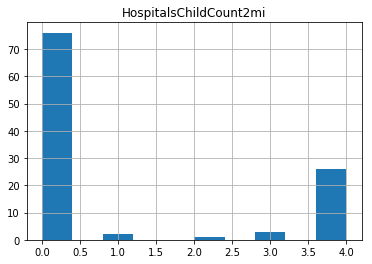

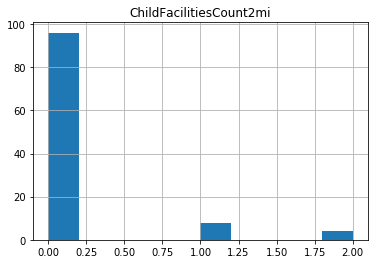

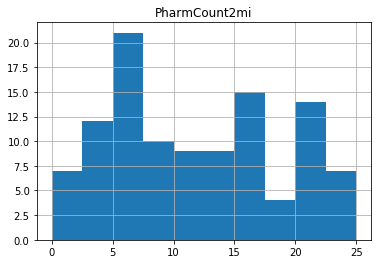

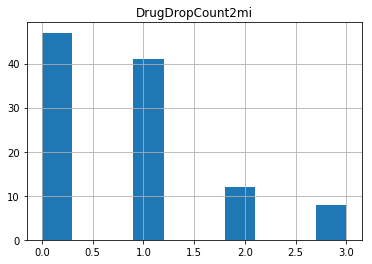

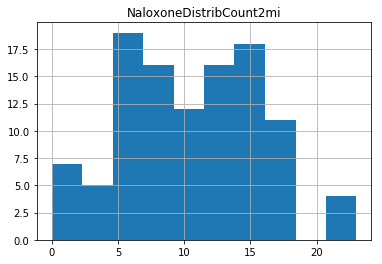

In [13]:
exp = exp.astype(np.float16)
for column in exp.columns:
    exp.hist(column)

In [9]:
pkl_in_Cin = open('CINCINcountMedicalFacilitiesCinbyTract.pkl', 'rb')

fac2 = pickle.load(pkl_in_Cin)

fac2.head()

,TractNumber,HospitalsGeneralCount,HospitalsPsychCount,SurgicalCentersCount,UrgentCareCount,WomensClinicsCount,PainManagementCount,PhysicalTherapyCount,MentalFacilitiesCount,SubstanceAbuseCount,OtherMedicalFacilitesCount,NursingAssistedLiveCount,HospiceCount,HospitalsChildCount,ChildFacilitiesCount,PharmCount,DrugDropCount,NaloxoneDistribCount,geometry
0,45.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((-84.41979 39.08133, -84.41974 ..."
1,46.02,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,"MULTIPOLYGON (((-84.37076 39.08596, -84.37075 ..."
2,46.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((-84.37590 39.08449, -84.37566 39.084..."
3,46.05,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"MULTIPOLYGON (((-84.38695 39.10141, -84.38690 ..."
4,46.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((-84.37198 39.09470, -84.37240 39.094..."


In [19]:
exp2=fac2.drop(columns=['geometry'])
exp2.head()

,TractNumber,HospitalsGeneralCount,HospitalsPsychCount,SurgicalCentersCount,UrgentCareCount,WomensClinicsCount,PainManagementCount,PhysicalTherapyCount,MentalFacilitiesCount,SubstanceAbuseCount,OtherMedicalFacilitesCount,NursingAssistedLiveCount,HospiceCount,HospitalsChildCount,ChildFacilitiesCount,PharmCount,DrugDropCount,NaloxoneDistribCount
0,45.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,46.02,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0
2,46.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,46.05,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,46.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
exp2.corr()

,HospitalsGeneralCount,HospitalsPsychCount,SurgicalCentersCount,UrgentCareCount,WomensClinicsCount,PainManagementCount,PhysicalTherapyCount,MentalFacilitiesCount,SubstanceAbuseCount,OtherMedicalFacilitesCount,NursingAssistedLiveCount,HospiceCount,HospitalsChildCount,ChildFacilitiesCount,PharmCount,DrugDropCount,NaloxoneDistribCount
HospitalsGeneralCount,1.000000,0.142626,0.190472,-0.060540,0.248980,0.321738,0.331497,0.171313,0.241679,0.255701,0.268044,0.372684,0.447130,NaN,0.156085,-0.044898,0.083148
HospitalsPsychCount,0.142626,1.000000,-0.020139,-0.031307,-0.023218,-0.018868,-0.026939,0.296589,-0.037156,0.003095,0.138614,-0.021856,-0.016844,NaN,-0.006862,-0.023218,-0.015050
SurgicalCentersCount,0.190472,-0.020139,1.000000,0.237259,-0.024783,0.197364,0.747596,-0.032303,0.531439,0.377897,0.105904,-0.023328,-0.017979,NaN,0.356524,-0.024783,0.045896
UrgentCareCount,-0.060540,-0.031307,0.237259,1.000000,0.134840,0.180017,0.407879,-0.050217,0.123306,0.109122,-0.055987,-0.036265,-0.027949,NaN,0.326757,0.134840,0.263985
WomensClinicsCount,0.248980,-0.023218,-0.024783,0.134840,1.000000,-0.023218,0.265197,0.230900,0.137169,0.106633,0.008978,-0.026895,0.538925,NaN,0.143540,-0.028571,0.100534
PainManagementCount,0.321738,-0.018868,0.197364,0.180017,-0.023218,1.000000,0.336733,-0.030264,-0.037156,0.337330,0.040125,-0.021856,-0.016844,NaN,0.141347,-0.023218,0.042999
PhysicalTherapyCount,0.331497,-0.026939,0.747596,0.407879,0.265197,0.336733,1.000000,0.190122,0.424397,0.481622,0.057289,-0.031204,0.462949,NaN,0.413412,-0.033150,0.185709
MentalFacilitiesCount,0.171313,0.296589,-0.032303,-0.050217,0.230900,-0.030264,0.190122,1.000000,0.226474,0.192604,-0.030425,-0.035056,0.410676,NaN,0.107857,-0.037242,0.031726
SubstanceAbuseCount,0.241679,-0.037156,0.531439,0.123306,0.137169,-0.037156,0.424397,0.226474,1.000000,0.207212,0.100568,-0.043040,0.265368,NaN,0.099990,-0.045723,-0.042338
OtherMedicalFacilitesCount,0.255701,0.003095,0.377897,0.109122,0.106633,0.337330,0.481622,0.192604,0.207212,1.000000,-0.055045,-0.093206,0.263851,NaN,0.347538,0.038083,0.240500


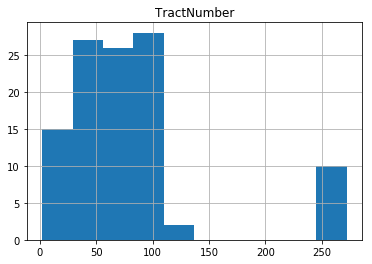

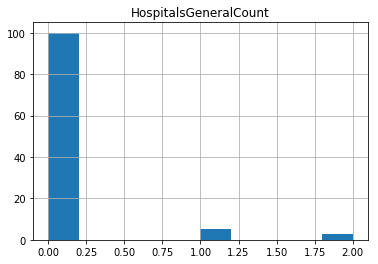

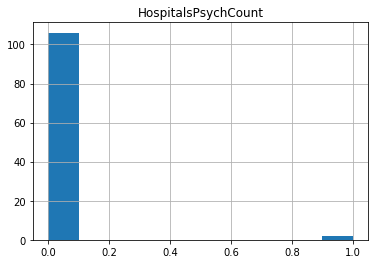

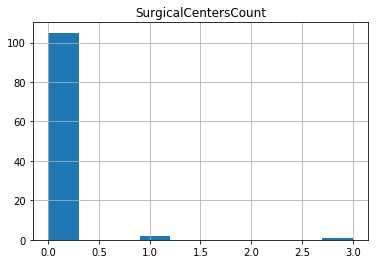

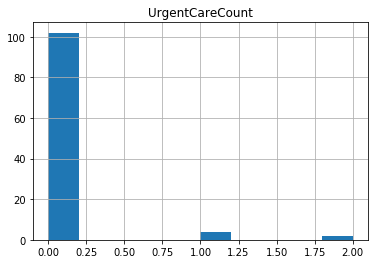

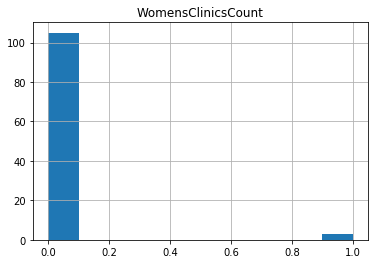

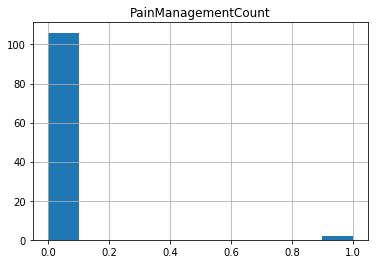

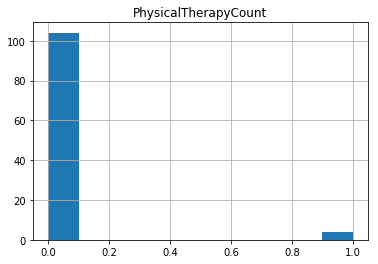

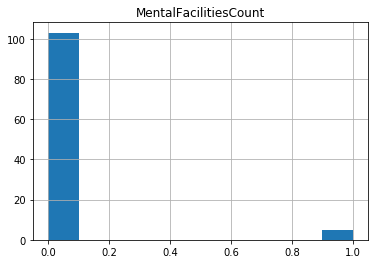

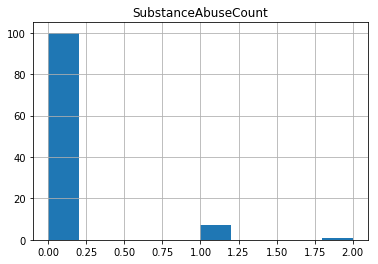

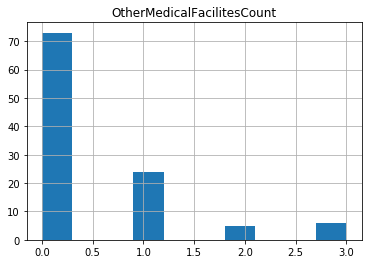

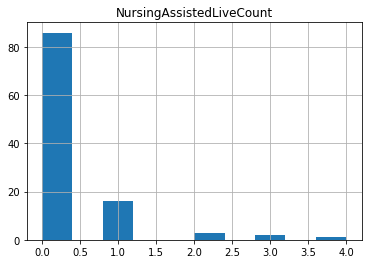

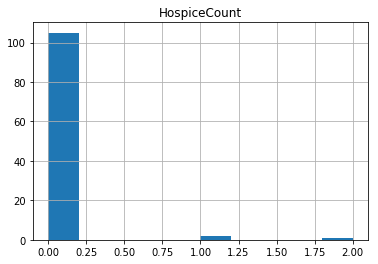

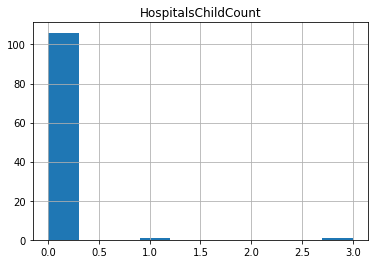

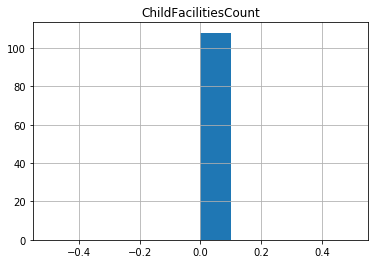

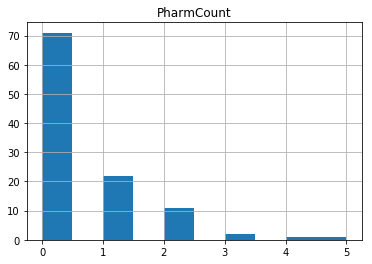

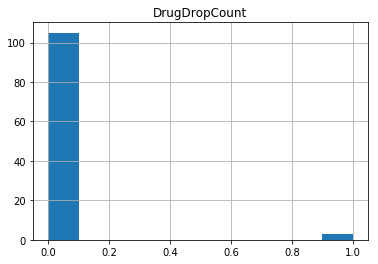

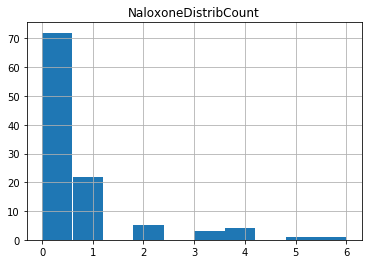

In [22]:
#HospitalsPsychCount, UrgentCareCount, NursingAssistedLiveCount, HospiceCount, ChildFacilitiesCount, PharmCount
#need normalization: HospitalsPsychCount, ChildFacilitiesCount
exp2 = exp2.astype(np.float16)
for column in exp2.columns:
    exp2.hist(column)
#UrgentCareCount2mi -SurgicalCentersCount2mi,PhysicalTherapyCount2mi, 
#NursingAssistedLiveCount2mi
#PharmCount2mi  -HospitalGeneralCount2mi, WomensClinicsCount2mi, PainManagementCount2mi, PhysicalTherapyCount2mi,MentalFacilitiesCount2mi,SubstanceAbuseCount2mi,OtherMedicalFacilitesCount2mi, HospitalsChildCount2mi, DrugDropCount2mi, NaloxoneDistribCount2mi   
#NaloxoneDistribCount2mi-HospitalGeneralCount2mi, WomensClinicsCount2mi, SubstanceAbuseCount2mi, OtherMedicalFacilitesCount2mi,PharmCount2mi 

In [15]:
#the cleaned cincinnati census tracts with the correct census tract numbers
pkl_in_Cin = open('CincinnatiCensusTracts.pkl', 'rb')

tract = pickle.load(pkl_in_Cin)

tract.head()

,OBJECTID_1,TRACTCE10,OBJECTID_2,CAGIS.Cinc_City_Boundary.AREA,PERIMETER,BND_NAME,SQMI,GLOBALID,SHAPE.AREA,SHAPE.LEN,CREATED_USER,CREATED_DATE,LAST_EDITED_USER,LAST_EDITED_DATE,geometry
0,197,45.00,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"MULTIPOLYGON (((-84.41979 39.08133, -84.41974 ..."
1,198,46.02,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"MULTIPOLYGON (((-84.37076 39.08596, -84.37075 ..."
2,214,46.03,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"POLYGON ((-84.37590 39.08449, -84.37566 39.084..."
3,216,46.05,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"MULTIPOLYGON (((-84.38695 39.10141, -84.38690 ..."
4,215,46.04,962,None,671358.22726,CINCINNATI,79.716,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},0.0,0.0,cagis,1424811134000,cagis,1424811134000,"POLYGON ((-84.37198 39.09470, -84.37240 39.094..."


In [17]:
#keep columns:
#HospitalsPsychCount, UrgentCareCount, NursingAssistedLiveCount, HospiceCount, ChildFacilitiesCount, PharmCount
#need normalization: HospitalsPsychCount, ChildFacilitiesCount
pdb = pd.read_csv('pdb2019trv6_us.csv',encoding = "ISO-8859-1")
cin = pdb[(pdb['State_name'] == 'Ohio') ]
print(cin)
print(cin.columns)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (286) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


             GIDTR  State State_name  County     County_name   Tract  Flag  \
50530  39001770100     39       Ohio       1    Adams County  770100   NaN   
50531  39001770200     39       Ohio       1    Adams County  770200   NaN   
50532  39001770300     39       Ohio       1    Adams County  770300   NaN   
50533  39001770400     39       Ohio       1    Adams County  770400   NaN   
50534  39001770500     39       Ohio       1    Adams County  770500   NaN   
...            ...    ...        ...     ...             ...     ...   ...   
53477  39175938100     39       Ohio     175  Wyandot County  938100   NaN   
53478  39175938200     39       Ohio     175  Wyandot County  938200   NaN   
53479  39175938300     39       Ohio     175  Wyandot County  938300   NaN   
53480  39175938400     39       Ohio     175  Wyandot County  938400   NaN   
53481  39175938500     39       Ohio     175  Wyandot County  938500   NaN   

       Num_BGs_in_Tract  LAND_AREA  AIAN_LAND  ...  \
50530    

In [18]:
var = ['Med_HHD_Inc_ACS_13_17', 'Median_Age_ACS_13_17','pct_College_ACS_13_17',
       'pct_Not_HS_Grad_ACS_13_17','pct_NoHealthIns_65P_ACS_13_17',
       'pct_NH_White_alone_ACS_13_17','pct_NH_AIAN_alone_ACS_13_17', 'pct_Males_ACS_13_17', 'pct_Pop_18_24_ACS_13_17',
       'pct_Pop_65plus_ACS_13_17','pct_Prs_Blw_Pov_Lev_ACS_13_17', 'pct_One_Health_Ins_ACS_13_17'
       ,'pct_Two_Plus_Health_Ins_ACS_13_17','Civ_labor_16plus_ACS_13_17','pct_Civ_unemp_16plus_ACS_13_17',
        'Civ_labor_16_24_ACS_13_17','pct_Civ_unemp_16_24_ACS_13_17','Civ_labor_25_44_ACS_13_17',
       'Civ_labor_45_64_ACS_13_17','pct_Civ_unemp_45_64_ACS_13_17','pct_PUB_ASST_INC_ACS_13_17','Tract']
cin = cin.filter(var)
cin.Tract=cin.Tract.astype(float)
print(cin['Civ_labor_45_64_ACS_13_17'])


50530     732.0
50531     731.0
50532    1277.0
50533     697.0
50534     457.0
          ...  
53477     941.0
53478     748.0
53479     531.0
53480     608.0
53481     781.0
Name: Civ_labor_45_64_ACS_13_17, Length: 2952, dtype: float64


In [32]:
#align labeling of tracts between fac and pdb - need codes w/o decimals
fac.TractNumber = fac.TractNumber.astype(float)
#fac.CensusTract = int(fac.CensusTract)
fac.TractNumber = fac.TractNumber *100

print(fac)
exp=fac[['TractNumber','HospitalsPsychCount2mi', 'UrgentCareCount2mi', 'NursingAssistedLiveCount2mi', 'HospiceCount2mi', 'ChildFacilitiesCount2mi', 'PharmCount2mi','geometry']]
print(exp)

     TractNumber  HospitalsGeneralCount2mi  HospitalsPsychCount2mi  \
0         4500.0                         0                       0   
1         4602.0                         0                       0   
2         4603.0                         1                       0   
3         4605.0                         0                       0   
4         4604.0                         0                       0   
..           ...                       ...                     ...   
103       9700.0                         0                       0   
104      10300.0                         0                       0   
105      10400.0                         0                       0   
106      10500.0                         0                       0   
107      10600.0                         0                       0   

     SurgicalCentersCount2mi  UrgentCareCount2mi  WomensClinicsCount2mi  \
0                          0                   0                      0   
1        

In [33]:
df = exp.merge(cin, left_on='TractNumber', right_on='Tract')
df

,TractNumber,HospitalsPsychCount2mi,UrgentCareCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,ChildFacilitiesCount2mi,PharmCount2mi,geometry,Med_HHD_Inc_ACS_13_17,Median_Age_ACS_13_17,...,pct_Prs_Blw_Pov_Lev_ACS_13_17,pct_One_Health_Ins_ACS_13_17,Civ_labor_16plus_ACS_13_17,Civ_labor_16_24_ACS_13_17,pct_Civ_unemp_16_24_ACS_13_17,Civ_labor_25_44_ACS_13_17,Civ_labor_45_64_ACS_13_17,pct_Civ_unemp_45_64_ACS_13_17,pct_PUB_ASST_INC_ACS_13_17,Tract
0,4500.0,0,0,2,0,0,0,"MULTIPOLYGON (((-84.41979 39.08133, -84.41974 ...","$29,524",34.3,...,33.52,70.39,2212.0,227.0,25.11,1188.0,709.0,2.54,8.70,4500.0
1,4500.0,0,0,2,0,0,0,"MULTIPOLYGON (((-84.41979 39.08133, -84.41974 ...","$92,167",44.2,...,3.38,85.11,574.0,65.0,0.00,197.0,231.0,4.33,2.15,4500.0
2,4500.0,0,0,2,0,0,0,"MULTIPOLYGON (((-84.41979 39.08133, -84.41974 ...","$46,707",33.6,...,12.10,72.81,2241.0,419.0,12.17,1144.0,614.0,3.91,3.46,4500.0
3,4602.0,0,1,5,0,0,4,"MULTIPOLYGON (((-84.37076 39.08596, -84.37075 ...","$49,063",36.6,...,7.35,72.50,2372.0,252.0,0.00,1027.0,940.0,6.49,3.54,4602.0
4,4603.0,0,1,5,1,0,6,"POLYGON ((-84.37590 39.08449, -84.37566 39.084...","$66,556",40.2,...,3.30,80.39,1718.0,104.0,0.00,922.0,612.0,1.63,0.80,4603.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,10600.0,0,0,0,0,0,0,"POLYGON ((-84.70281 39.13102, -84.70281 39.130...","$55,604",38.0,...,14.22,78.06,2314.0,250.0,13.20,1052.0,892.0,1.91,2.96,10600.0
347,10600.0,0,0,0,0,0,0,"POLYGON ((-84.70281 39.13102, -84.70281 39.130...","$53,210",36.6,...,12.71,76.03,1829.0,235.0,0.85,772.0,770.0,7.01,0.34,10600.0
348,10600.0,0,0,0,0,0,0,"POLYGON ((-84.70281 39.13102, -84.70281 39.130...","$59,968",42.9,...,10.83,80.02,1805.0,279.0,0.72,648.0,777.0,0.00,0.43,10600.0
349,10600.0,0,0,0,0,0,0,"POLYGON ((-84.70281 39.13102, -84.70281 39.130...","$40,426",40.9,...,18.94,71.81,1716.0,416.0,9.62,591.0,638.0,4.39,8.25,10600.0


In [35]:
df.corr()

,TractNumber,HospitalsPsychCount2mi,UrgentCareCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,ChildFacilitiesCount2mi,PharmCount2mi,Median_Age_ACS_13_17,pct_College_ACS_13_17,pct_Not_HS_Grad_ACS_13_17,...,pct_Prs_Blw_Pov_Lev_ACS_13_17,pct_One_Health_Ins_ACS_13_17,Civ_labor_16plus_ACS_13_17,Civ_labor_16_24_ACS_13_17,pct_Civ_unemp_16_24_ACS_13_17,Civ_labor_25_44_ACS_13_17,Civ_labor_45_64_ACS_13_17,pct_Civ_unemp_45_64_ACS_13_17,pct_PUB_ASST_INC_ACS_13_17,Tract
TractNumber,1.000000,0.107168,-0.217183,0.035213,-0.260771,-0.278535,-0.439231,-0.007941,0.076854,-0.045498,...,-0.011640,0.113911,0.007239,-0.044511,0.098804,-0.000670,0.044348,0.012231,0.112474,1.000000
HospitalsPsychCount2mi,0.107168,1.000000,0.279253,0.104671,0.388935,-0.150136,-0.222450,-0.025004,0.066687,-0.063256,...,-0.053229,0.117232,0.078028,-0.024148,-0.079632,0.133693,0.053729,-0.065904,-0.087784,0.107168
UrgentCareCount2mi,-0.217183,0.279253,1.000000,0.322221,0.345183,0.055985,0.405272,-0.114795,0.146649,-0.041715,...,-0.046261,0.014023,0.068984,0.042661,-0.077177,0.151281,-0.036461,0.009205,-0.122983,-0.217183
NursingAssistedLiveCount2mi,0.035213,0.104671,0.322221,1.000000,-0.051642,-0.433092,0.134024,0.032637,0.028682,-0.006847,...,0.055240,-0.088319,-0.042802,-0.042514,-0.003559,-0.004187,-0.054098,-0.003107,-0.034871,0.035213
HospiceCount2mi,-0.260771,0.388935,0.345183,-0.051642,1.000000,0.235096,0.290337,-0.047672,0.051829,0.029851,...,0.024962,0.028164,0.014251,0.040833,-0.068225,0.044260,-0.048618,0.013912,-0.061835,-0.260771
ChildFacilitiesCount2mi,-0.278535,-0.150136,0.055985,-0.433092,0.235096,1.000000,0.242721,-0.017831,-0.075117,0.039143,...,0.013902,-0.085379,0.012186,0.081469,0.020981,-0.032582,-0.004824,0.050910,0.073140,-0.278535
PharmCount2mi,-0.439231,-0.222450,0.405272,0.134024,0.290337,0.242721,1.000000,-0.076657,-0.088397,0.182293,...,0.164782,-0.201956,-0.154873,0.017258,0.115608,-0.136923,-0.200508,0.157074,0.015546,-0.439231
Median_Age_ACS_13_17,-0.007941,-0.025004,-0.114795,0.032637,-0.047672,-0.017831,-0.076657,1.000000,-0.055066,-0.326760,...,-0.551514,-0.249906,0.095184,-0.366676,-0.121942,-0.025785,0.459358,-0.203779,-0.337998,-0.007941
pct_College_ACS_13_17,0.076854,0.066687,0.146649,0.028682,0.051829,-0.075117,-0.088397,-0.055066,1.000000,-0.635389,...,-0.398159,0.443786,0.282984,0.169551,-0.378457,0.349861,0.112801,-0.242549,-0.381636,0.076854
pct_Not_HS_Grad_ACS_13_17,-0.045498,-0.063256,-0.041715,-0.006847,0.029851,0.039143,0.182293,-0.326760,-0.635389,1.000000,...,0.659786,-0.360251,-0.418506,-0.164549,0.389134,-0.353407,-0.405277,0.415521,0.558136,-0.045498


In [37]:
#need normalization: HospitalsPsychCount, ChildFacilitiesCount
scaler = StandardScaler()
scaler.fit(df)
print(scaler.transform(df))
#print(df)

ValueError: setting an array element with a sequence.

In [38]:
from sodapy import Socrata
client = Socrata("data.cincinnati-oh.gov", None)
results = client.get("3gx7-se9a", limit=11000)

# Convert to pandas DataFrame
ems = pd.DataFrame.from_records(results)

In [39]:
ems.head()

,address_x,latitude_x,longitude_x,agency,create_time_incident,disposition_text,event_number,incident_type_id,priority,closed_time_incident,beat,community_council_neighborhood,district,incident_type_desc,priority_color,arrival_time_primary_unit,dispatch_time_primary_unit
0,16XX CALIFORNIA AV,39.1754784436823,-84.4670395218747,CPD,2017-05-16T20:35:05.000,BC: BROADCAST,CPD170516001810,DRUG,3,2017-05-16T20:40:39.000,P451,BOND HILL,4,NaN,NaN,NaN,NaN
1,16XX ILIFF AV,39.1177910001195,-84.580431,CPD,2017-10-13T21:25:58.000,INV: INV,CPD171013002052,DRUG,7,2017-10-13T22:16:51.000,P321,WEST PRICE HILL,3,DRUG ACTIVITY,YELLOW,2017-10-13T21:58:24.000,2017-10-13T21:44:59.000
2,21XX CLARA ST,39.1227367321796,-84.5518912925694,CPD,2017-03-22T20:41:51.000,AST: ASSIST,CPD170322001510,HEROINP-COMBINED,2,2017-03-23T02:13:01.000,P341,SOUTH FAIRMOUNT,3,NaN,NaN,2017-03-22T21:04:18.000,2017-03-22T20:52:13.000
3,13XX VINE ST,39.1095160001195,-84.515049,CPD,2017-12-13T02:29:05.000,INV: INV,CPD171213000116,DRUG,7,2017-12-13T02:44:10.000,P121,OTR,1,DRUG ACTIVITY,YELLOW,2017-12-13T02:31:36.000,2017-12-13T02:30:06.000
4,2XX W MCMICKEN AV,39.1194960001195,-84.524441,CPD,2017-09-05T16:28:05.000,ADV:ADVISED,CPD170905001184,DRUGR,35,2017-09-05T16:28:05.000,P121,OTR,1,DRUG COMPLAINT REFERRAL,PURPLE,NaN,NaN


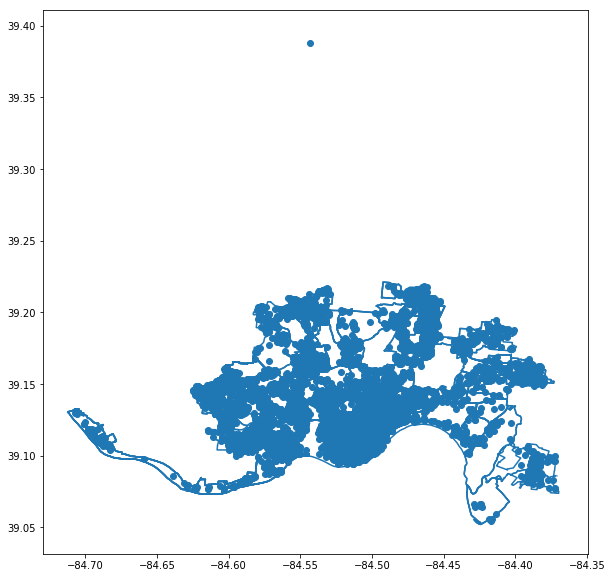

In [40]:
ems.longitude_x = ems.longitude_x.astype(float)
ems.latitude_x = ems.latitude_x.astype(float)
ems_gdf = gpd.GeoDataFrame(
    ems, geometry=gpd.points_from_xy(ems.longitude_x, ems.latitude_x))
cin_gdf = gpd.GeoDataFrame(df, geometry=df.geometry)
fig, ax = plt.subplots(figsize=(10,10))
ems_gdf.plot(ax=ax)
cin_gdf.boundary.plot(ax=ax)

In [41]:
out = pd.DataFrame()
for i in range(len(cin_gdf)):
    temp = ems_gdf[ems_gdf.within(cin_gdf.loc[i,'geometry'])]
    temp['tract'] = cin_gdf.loc[i,'Tract']
    out = pd.concat([out, temp])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
print(len(out))
print(len(ems))
out.closed_time_incident = pd.to_datetime(out.closed_time_incident)
out['year_month'] = out.closed_time_incident.dt.year.astype(float) + out.closed_time_incident.dt.month.astype(float)/100
out.head()

36467
10498


,address_x,latitude_x,longitude_x,agency,create_time_incident,disposition_text,event_number,incident_type_id,priority,closed_time_incident,beat,community_council_neighborhood,district,incident_type_desc,priority_color,arrival_time_primary_unit,dispatch_time_primary_unit,geometry,tract,year_month
676,62XX KELLOGG RD,39.055538,-84.418388,CPD,2017-07-22T21:16:36.000,HBF: HANDLED BY FIRE,CPD170722001558,HEROINP-COMBINED,2,2017-07-22 22:51:46,P241,CALIFORNIA,2,NaN,NaN,2017-07-22T21:30:30.000,2017-07-22T21:19:20.000,POINT (-84.41839 39.05554),4500.0,2017.07
1194,60XX TWO MILE RD,39.059569,-84.413295,CPD,2017-03-20T17:08:17.000,GOA: GOA,CPD170320001120,DRUG,3,2017-03-20 17:24:21,P241,CALIFORNIA,2,NaN,NaN,2017-03-20T17:21:02.000,2017-03-20T17:16:18.000,POINT (-84.41329 39.05957),4500.0,2017.03
2567,58XX KELLOGG AV,39.064740,-84.424266,CPD,2017-07-01T13:30:46.000,INV: INV,CPD170701000714,DRUG,7,2017-07-01 13:51:51,P241,CALIFORNIA,2,DRUG ACTIVITY,YELLOW,2017-07-01T13:40:42.000,2017-07-01T13:33:21.000,POINT (-84.42427 39.06474),4500.0,2017.07
2778,KELLOGG AV / ROHDE AV,39.066334,-84.423709,CPD,2017-06-25T00:05:08.000,INV: INV,CPD170625000007,DRUG,7,2017-06-25 00:18:00,P241,CALIFORNIA,2,DRUG ACTIVITY,YELLOW,2017-06-25T00:10:38.000,2017-06-25T00:05:50.000,POINT (-84.42371 39.06633),4500.0,2017.06
3463,59XX KELLOGG AV,39.064101,-84.423311,CPD,2017-02-10T12:05:43.000,ADV:ADVISED,CPD170210000621,DRUG,3,2017-02-10 12:44:18,P241,CALIFORNIA,2,NaN,NaN,2017-02-10T12:26:30.000,2017-02-10T12:18:47.000,POINT (-84.42331 39.06410),4500.0,2017.02


In [43]:
mt = out.groupby([out['year_month'],  out['tract']]).agg({'count'})
mt = mt['event_number']
mt.reset_index(inplace=True)

mt.rename(columns={'count': 'ems_call'}, inplace=True)
mt.head()

,year_month,tract,ems_call
0,2017.01,200.0,48
1,2017.01,700.0,280
2,2017.01,900.0,160
3,2017.01,1000.0,30
4,2017.01,1100.0,8


In [44]:
cin_gdf = cin_gdf.merge(mt, left_on='Tract', right_on='tract')
print(cin_gdf.columns)

Index(['TractNumber', 'HospitalsPsychCount2mi', 'UrgentCareCount2mi',
       'NursingAssistedLiveCount2mi', 'HospiceCount2mi',
       'ChildFacilitiesCount2mi', 'PharmCount2mi', 'geometry',
       'Med_HHD_Inc_ACS_13_17', 'Median_Age_ACS_13_17',
       'pct_College_ACS_13_17', 'pct_Not_HS_Grad_ACS_13_17',
       'pct_NoHealthIns_65P_ACS_13_17', 'pct_NH_White_alone_ACS_13_17',
       'pct_NH_AIAN_alone_ACS_13_17', 'pct_Males_ACS_13_17',
       'pct_Pop_18_24_ACS_13_17', 'pct_Pop_65plus_ACS_13_17',
       'pct_Prs_Blw_Pov_Lev_ACS_13_17', 'pct_One_Health_Ins_ACS_13_17',
       'Civ_labor_16plus_ACS_13_17', 'Civ_labor_16_24_ACS_13_17',
       'pct_Civ_unemp_16_24_ACS_13_17', 'Civ_labor_25_44_ACS_13_17',
       'Civ_labor_45_64_ACS_13_17', 'pct_Civ_unemp_45_64_ACS_13_17',
       'pct_PUB_ASST_INC_ACS_13_17', 'Tract', 'year_month', 'tract',
       'ems_call'],
      dtype='object')


In [45]:
cin_gdf.head()

,TractNumber,HospitalsPsychCount2mi,UrgentCareCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,ChildFacilitiesCount2mi,PharmCount2mi,geometry,Med_HHD_Inc_ACS_13_17,Median_Age_ACS_13_17,...,Civ_labor_16_24_ACS_13_17,pct_Civ_unemp_16_24_ACS_13_17,Civ_labor_25_44_ACS_13_17,Civ_labor_45_64_ACS_13_17,pct_Civ_unemp_45_64_ACS_13_17,pct_PUB_ASST_INC_ACS_13_17,Tract,year_month,tract,ems_call
0,4500.0,0,0,2,0,0,0,"MULTIPOLYGON (((-84.41979 39.08133, -84.41974 ...","$29,524",34.3,...,227.0,25.11,1188.0,709.0,2.54,8.7,4500.0,2017.02,4500.0,3
1,4500.0,0,0,2,0,0,0,"MULTIPOLYGON (((-84.41979 39.08133, -84.41974 ...","$29,524",34.3,...,227.0,25.11,1188.0,709.0,2.54,8.7,4500.0,2017.03,4500.0,3
2,4500.0,0,0,2,0,0,0,"MULTIPOLYGON (((-84.41979 39.08133, -84.41974 ...","$29,524",34.3,...,227.0,25.11,1188.0,709.0,2.54,8.7,4500.0,2017.05,4500.0,3
3,4500.0,0,0,2,0,0,0,"MULTIPOLYGON (((-84.41979 39.08133, -84.41974 ...","$29,524",34.3,...,227.0,25.11,1188.0,709.0,2.54,8.7,4500.0,2017.06,4500.0,3
4,4500.0,0,0,2,0,0,0,"MULTIPOLYGON (((-84.41979 39.08133, -84.41974 ...","$29,524",34.3,...,227.0,25.11,1188.0,709.0,2.54,8.7,4500.0,2017.07,4500.0,6


In [53]:
cin_gdf['Med_HHD_Inc_ACS_13_17']=cin_gdf['Med_HHD_Inc_ACS_13_17'].astype(str)
cin_gdf['Med_HHD_Inc_ACS_13_17'] = [x.strip('$,') for x in cin_gdf['Med_HHD_Inc_ACS_13_17']]

print(cin_gdf['Med_HHD_Inc_ACS_13_17'])
cin_gdf['Med_HHD_Inc_ACS_13_17'][1][:]

0       29,524
1       29,524
2       29,524
3       29,524
4       29,524
         ...  
3940    52,450
3941    52,450
3942    52,450
3943    52,450
3944    52,450
Name: Med_HHD_Inc_ACS_13_17, Length: 3945, dtype: object


'29,524'

In [60]:
cin_gdf['mhi'] = 0
for i in range(len(cin_gdf)):
    cin_gdf['mhi']= cin_gdf['Med_HHD_Inc_ACS_13_17'].map(lambda x: re.sub(r'\W+', '', x))
    #cin_gdf['mhi'][i] = cin_gdf['Med_HHD_Inc_ACS_13_17'][i][:2] + cin_gdf['Med_HHD_Inc_ACS_13_17'][i][3:]

In [62]:
print(cin_gdf['mhi'])
cin_gdf.mhi = cin_gdf.mhi.astype(float)
cin_gdf.corr()

0       29524.0
1       29524.0
2       29524.0
3       29524.0
4       29524.0
         ...   
3940    52450.0
3941    52450.0
3942    52450.0
3943    52450.0
3944    52450.0
Name: mhi, Length: 3945, dtype: float64


,TractNumber,HospitalsPsychCount2mi,UrgentCareCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,ChildFacilitiesCount2mi,PharmCount2mi,Median_Age_ACS_13_17,pct_College_ACS_13_17,pct_Not_HS_Grad_ACS_13_17,...,pct_Civ_unemp_16_24_ACS_13_17,Civ_labor_25_44_ACS_13_17,Civ_labor_45_64_ACS_13_17,pct_Civ_unemp_45_64_ACS_13_17,pct_PUB_ASST_INC_ACS_13_17,Tract,year_month,tract,ems_call,mhi
TractNumber,1.000000,0.099671,-0.246189,0.045550,-0.268031,-0.272460,-0.451922,-0.013920,0.072267,-0.031993,...,0.116791,-0.003535,0.037016,0.024827,0.130204,1.000000,-0.009233,1.000000,-0.315209,0.042427
HospitalsPsychCount2mi,0.099671,1.000000,0.226081,0.068677,0.376670,-0.147101,-0.246665,-0.018312,0.052646,-0.048197,...,-0.063644,0.127263,0.047389,-0.061325,-0.079072,0.099671,-0.017594,0.099671,-0.129934,0.009754
UrgentCareCount2mi,-0.246189,0.226081,1.000000,0.285906,0.301731,0.081768,0.443755,-0.094084,0.131577,-0.053993,...,-0.058979,0.150926,-0.033094,0.005931,-0.152589,-0.246189,-0.015110,-0.246189,0.069547,0.014659
NursingAssistedLiveCount2mi,0.045550,0.068677,0.285906,1.000000,-0.102255,-0.455414,0.104378,0.035453,0.023500,-0.004221,...,-0.000421,-0.009055,-0.057972,-0.009991,-0.038069,0.045550,0.001319,0.045550,-0.262808,-0.045221
HospiceCount2mi,-0.268031,0.376670,0.301731,-0.102255,1.000000,0.241168,0.283270,-0.040782,0.039814,0.031680,...,-0.064119,0.040248,-0.048317,0.010610,-0.066695,-0.268031,-0.002959,-0.268031,0.160663,-0.017936
ChildFacilitiesCount2mi,-0.272460,-0.147101,0.081768,-0.455414,0.241168,1.000000,0.241349,-0.020966,-0.071849,0.043311,...,0.015417,-0.027681,-0.007900,0.053008,0.076952,-0.272460,0.013286,-0.272460,0.498708,-0.027183
PharmCount2mi,-0.451922,-0.246665,0.443755,0.104378,0.283270,0.241349,1.000000,-0.078610,-0.096536,0.192352,...,0.108952,-0.142231,-0.208127,0.150581,0.016469,-0.451922,0.012887,-0.451922,0.288960,-0.197227
Median_Age_ACS_13_17,-0.013920,-0.018312,-0.094084,0.035453,-0.040782,-0.020966,-0.078610,1.000000,-0.060329,-0.322158,...,-0.119094,-0.027499,0.458695,-0.198571,-0.330008,-0.013920,0.003583,-0.013920,0.018838,0.360874
pct_College_ACS_13_17,0.072267,0.052646,0.131577,0.023500,0.039814,-0.071849,-0.096536,-0.060329,1.000000,-0.626935,...,-0.368509,0.345672,0.115254,-0.231006,-0.371072,0.072267,-0.003993,0.072267,-0.081787,0.628698
pct_Not_HS_Grad_ACS_13_17,-0.031993,-0.048197,-0.053993,-0.004221,0.031680,0.043311,0.192352,-0.322158,-0.626935,1.000000,...,0.384092,-0.350310,-0.408154,0.405479,0.541995,-0.031993,0.001831,-0.031993,0.047578,-0.636783


ValueError: hist method requires numerical columns, nothing to plot.

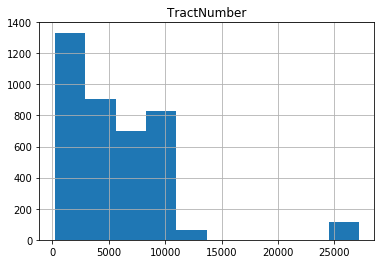

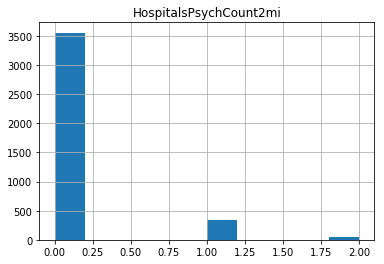

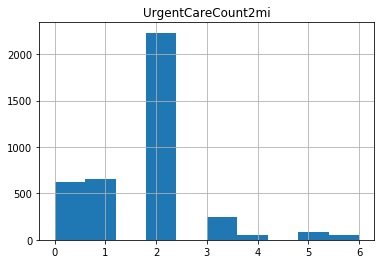

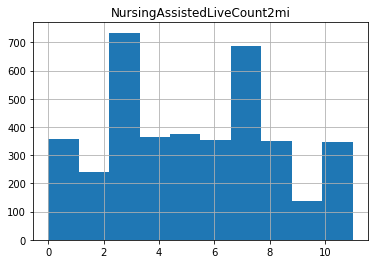

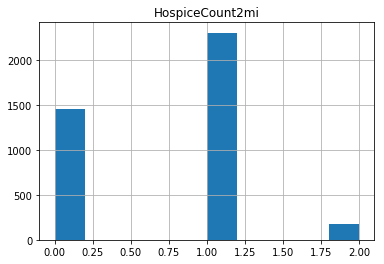

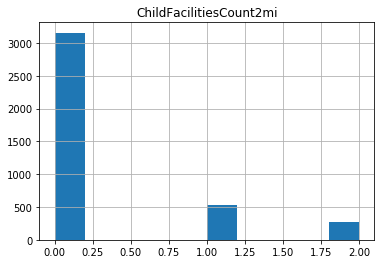

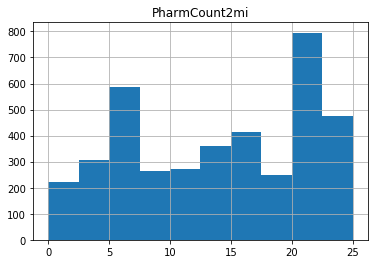

In [99]:
for column in cin_gdf.columns:
    cin_gdf.hist(column)

In [151]:
columns=['HospitalsPsychCount2mi','ChildFacilitiesCount2mi','pct_NoHealthIns_65P_ACS_13_17','pct_College_ACS_13_17','Civ_labor_16_24_ACS_13_17','pct_Civ_unemp_16_24_ACS_13_17','pct_Civ_unemp_45_64_ACS_13_17']
cin_gdf[columns] = StandardScaler().fit_transform(cin_gdf[columns])
cin_gdf_2 = pd.get_dummies(cin_gdf, columns=['year_month', 'Tract'], drop_first=True)
cin_gdf_standard=cin_gdf_2.drop(['TractNumber', 'geometry', 'tract','Med_HHD_Inc_ACS_13_17'], axis=1)
features=cin_gdf_standard.columns
scaler = StandardScaler()
scaler.fit(cin_gdf_standard)

cin_gdf_standard = scaler.transform(cin_gdf_standard)
cin_gdf_standard = pd.DataFrame(cin_gdf_standard)


for i in range(len(cin_gdf_standard.columns)):
    cin_gdf_standard.rename(columns={cin_gdf_standard.columns[i]: features[i]}, inplace=True)


cin_gdf_standard.corr()
cin_gdf_standard.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


,HospitalsPsychCount2mi,UrgentCareCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,ChildFacilitiesCount2mi,PharmCount2mi,Median_Age_ACS_13_17,pct_College_ACS_13_17,pct_Not_HS_Grad_ACS_13_17,pct_NoHealthIns_65P_ACS_13_17,...,Tract_26300.0,Tract_26400.0,Tract_26500.0,Tract_26600.0,Tract_26700.0,Tract_26800.0,Tract_26900.0,Tract_27000.0,Tract_27100.0,Tract_27200.0
0,-0.316352,-1.546782,-1.199867,-1.214598,-0.464991,-1.857824,-0.352758,-0.795189,1.340424,-0.267443,...,-0.055237,-0.055237,-0.055237,-0.052879,-0.055237,-0.047818,-0.055237,-0.055237,-0.055237,-0.055237
1,-0.316352,-1.546782,-1.199867,-1.214598,-0.464991,-1.857824,-0.352758,-0.795189,1.340424,-0.267443,...,-0.055237,-0.055237,-0.055237,-0.052879,-0.055237,-0.047818,-0.055237,-0.055237,-0.055237,-0.055237
2,-0.316352,-1.546782,-1.199867,-1.214598,-0.464991,-1.857824,-0.352758,-0.795189,1.340424,-0.267443,...,-0.055237,-0.055237,-0.055237,-0.052879,-0.055237,-0.047818,-0.055237,-0.055237,-0.055237,-0.055237
3,-0.316352,-1.546782,-1.199867,-1.214598,-0.464991,-1.857824,-0.352758,-0.795189,1.340424,-0.267443,...,-0.055237,-0.055237,-0.055237,-0.052879,-0.055237,-0.047818,-0.055237,-0.055237,-0.055237,-0.055237
4,-0.316352,-1.546782,-1.199867,-1.214598,-0.464991,-1.857824,-0.352758,-0.795189,1.340424,-0.267443,...,-0.055237,-0.055237,-0.055237,-0.052879,-0.055237,-0.047818,-0.055237,-0.055237,-0.055237,-0.055237


In [163]:
print(cin_gdf.head())
cin_gdf_no_year_month=cin_gdf.drop(columns=['year_month','Tract','TractNumber','tract','geometry','Med_HHD_Inc_ACS_13_17'])
min_max_normalized_df=(cin_gdf_no_year_month-cin_gdf_no_year_month.min())/(cin_gdf_no_year_month.max()-cin_gdf_no_year_month.min())

   TractNumber  HospitalsPsychCount2mi  UrgentCareCount2mi  \
0       4500.0               -0.316352                   0   
1       4500.0               -0.316352                   0   
2       4500.0               -0.316352                   0   
3       4500.0               -0.316352                   0   
4       4500.0               -0.316352                   0   

   NursingAssistedLiveCount2mi  HospiceCount2mi  ChildFacilitiesCount2mi  \
0                            2                0                -0.464991   
1                            2                0                -0.464991   
2                            2                0                -0.464991   
3                            2                0                -0.464991   
4                            2                0                -0.464991   

   PharmCount2mi                                           geometry  \
0              0  MULTIPOLYGON (((-84.41979 39.08133, -84.41974 ...   
1              0  MULTIPOLYG

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


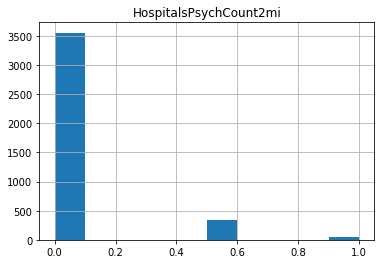

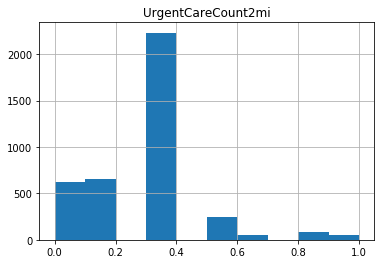

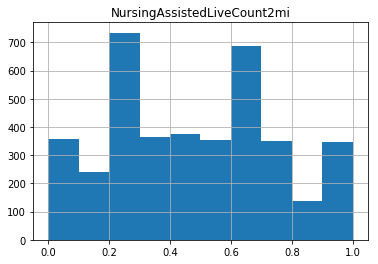

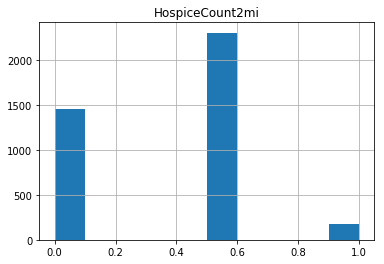

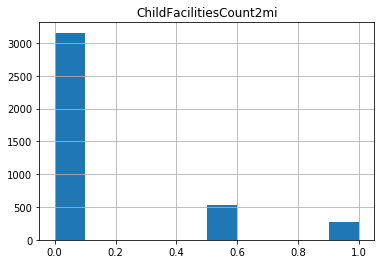

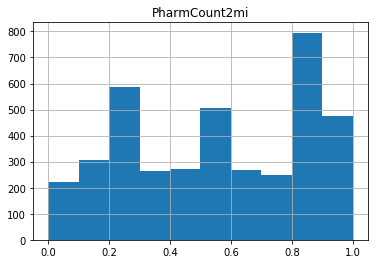

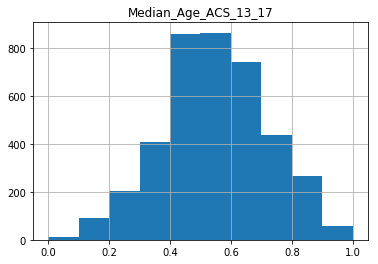

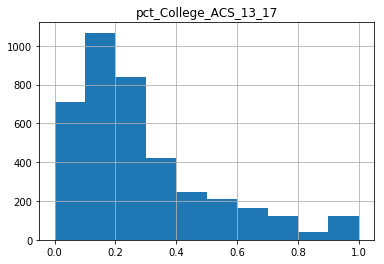

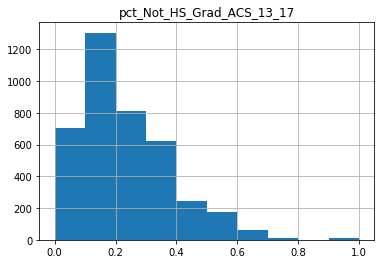

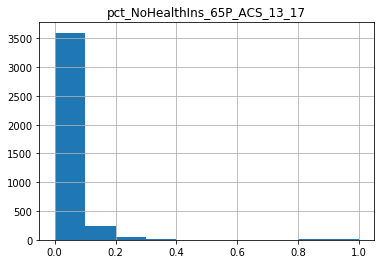

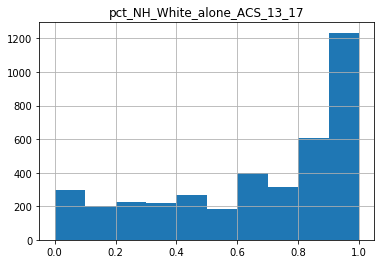

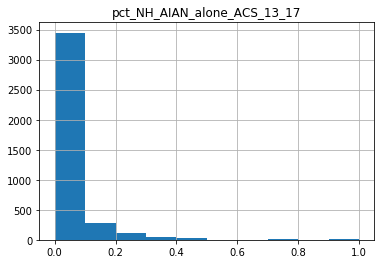

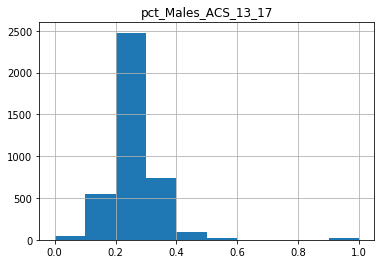

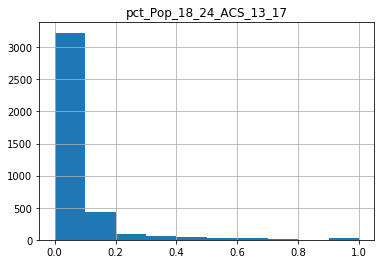

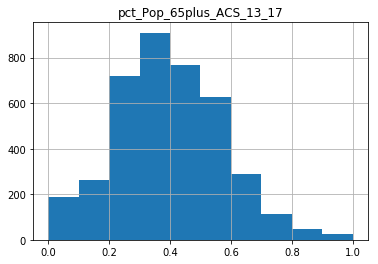

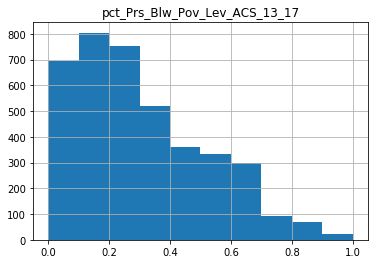

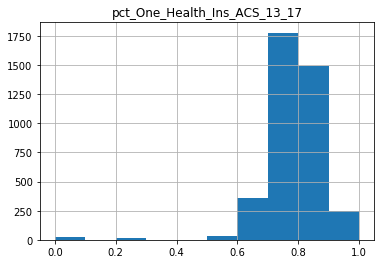

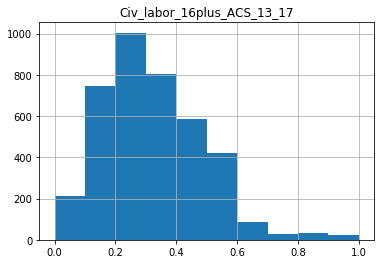

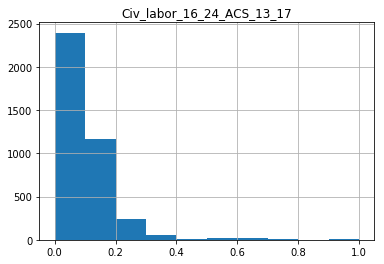

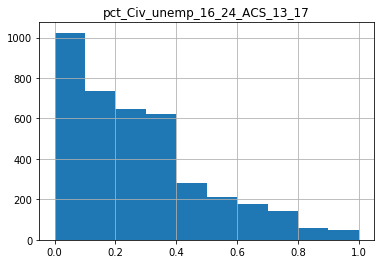

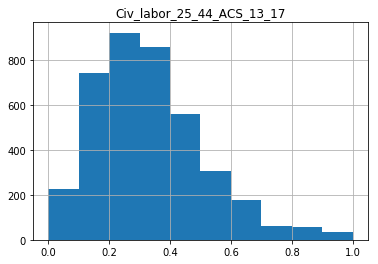

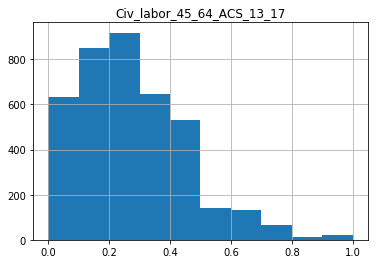

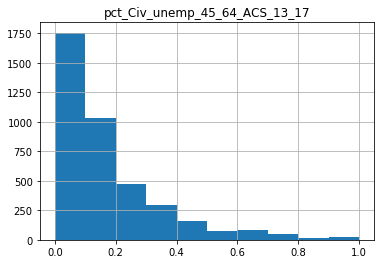

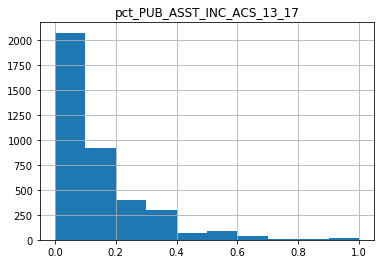

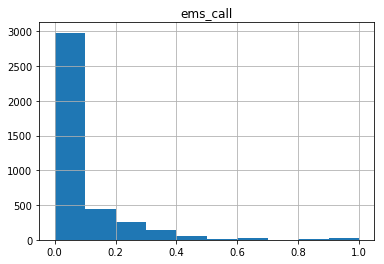

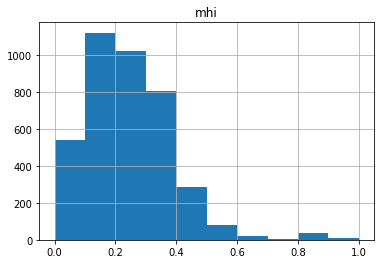

In [164]:
for column in min_max_normalized_df.columns:
    min_max_normalized_df.hist(column)

In [132]:
print(cin_gdf_standard.ems_call)

0      -0.625554
1      -0.625554
2      -0.625554
3      -0.625554
4      -0.588357
          ...   
3940   -0.600756
3941   -0.476766
3942   -0.600756
3943   -0.538761
3944   -0.600756
Name: ems_call, Length: 3945, dtype: float64


Index(['HospitalsPsychCount2mi', 'UrgentCareCount2mi',
       'NursingAssistedLiveCount2mi', 'HospiceCount2mi',
       'ChildFacilitiesCount2mi', 'PharmCount2mi', 'Median_Age_ACS_13_17',
       'pct_College_ACS_13_17', 'pct_Not_HS_Grad_ACS_13_17',
       'pct_NoHealthIns_65P_ACS_13_17',
       ...
       'Tract_26300.0', 'Tract_26400.0', 'Tract_26500.0', 'Tract_26600.0',
       'Tract_26700.0', 'Tract_26800.0', 'Tract_26900.0', 'Tract_27000.0',
       'Tract_27100.0', 'Tract_27200.0'],
      dtype='object', length=144)


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [147]:
"""
'HospitalsPsychCount2mi', 'UrgentCareCount2mi',
       'NursingAssistedLiveCount2mi', 'HospiceCount2mi',
       'ChildFacilitiesCount2mi', 'PharmCount2mi'
"""
mask = np.random.rand(len(cin_gdf_standard)) < 0.8
print(cin_gdf_standard.columns)
#print(cin_train.isnull().values.any())
cin_train = cin_gdf_standard[mask]
cin_test = cin_gdf_standard[~mask]
cin_train.dropna(inplace=True)
cin_test.dropna(inplace=True)
print('Training data set length='+str(len(cin_train)))
print('Testing data set length='+str(len(cin_test)))
y_train, X_train = cin_train.ems_call, cin_train
y_test, X_test = cin_test.ems_call, cin_test
#X_train.drop(columns='ems_call', inplace=True)

X_train=X_train[['pct_NoHealthIns_65P_ACS_13_17','Civ_labor_25_44_ACS_13_17','pct_Males_ACS_13_17','pct_College_ACS_13_17','Civ_labor_16_24_ACS_13_17','NursingAssistedLiveCount2mi','pct_Civ_unemp_16_24_ACS_13_17','pct_Civ_unemp_45_64_ACS_13_17','Median_Age_ACS_13_17','HospitalsPsychCount2mi','HospiceCount2mi','ChildFacilitiesCount2mi','UrgentCareCount2mi','PharmCount2mi']]
X_test=X_test[['pct_NoHealthIns_65P_ACS_13_17','Civ_labor_25_44_ACS_13_17','pct_Males_ACS_13_17','pct_College_ACS_13_17','Civ_labor_16_24_ACS_13_17','NursingAssistedLiveCount2mi','pct_Civ_unemp_16_24_ACS_13_17','pct_Civ_unemp_45_64_ACS_13_17','Median_Age_ACS_13_17','HospitalsPsychCount2mi','HospiceCount2mi','ChildFacilitiesCount2mi','UrgentCareCount2mi','PharmCount2mi']]



#X_test.drop(columns='ems_call', inplace=True)


res = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
res.summary()
#

Index(['HospitalsPsychCount2mi', 'UrgentCareCount2mi',
       'NursingAssistedLiveCount2mi', 'HospiceCount2mi',
       'ChildFacilitiesCount2mi', 'PharmCount2mi', 'Median_Age_ACS_13_17',
       'pct_College_ACS_13_17', 'pct_Not_HS_Grad_ACS_13_17',
       'pct_NoHealthIns_65P_ACS_13_17',
       ...
       'Tract_26300.0', 'Tract_26400.0', 'Tract_26500.0', 'Tract_26600.0',
       'Tract_26700.0', 'Tract_26800.0', 'Tract_26900.0', 'Tract_27000.0',
       'Tract_27100.0', 'Tract_27200.0'],
      dtype='object', length=144)
Training data set length=3124
Testing data set length=809


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               ems_call   No. Observations:                 3124
Model:                            GLM   Df Residuals:                     3110
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4242.3
Date:                Sun, 23 Feb 2020   Deviance:                       76850.
Time:                        21:24:10   Pearson chi2:                 5.38e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
pct_NoHealthIns_65P_ACS_13_17     0.0162      0.016      0.991      0.322      -0.016       0.048
Civ_labor_25_44_ACS_13_17         0.0345      0.021      1.642      0.101      -0.007       0.076
pct_Males_ACS_13_17               0.0717      0.017      4.339      0.000       0.039       0.104
pct_College_ACS_13_17            -0.0531      0.020     -2.643      0.008      -0.093      -0.014
Civ_labor_16_24_ACS_13_17         0.0256      0.018      1.395      0.163      -0.010       0.061
NursingAssistedLiveCount2mi      -0.0616      0.023     -2.695      0.007      -0.106      -0.017
pct_Civ_unemp_16_24_ACS_13_17    -0.0303      0.019     -1.571      0.116      -0.068       0.007
pct_Civ_unemp_45_64_ACS_13_17     0.0336      0.018      1.872      0.061      -0.002       0.069
Median_Age_ACS_13_17              0.0749      0.020      3.773      0.000       0.036       0.114
HospitalsPsychCount2mi           -0.0014      0.027     -0.050      0.960      -0.054       0.052
HospiceCount2mi                  -0.0022      0.025     -0.089      0.929      -0.051       0.047
ChildFacilitiesCount2mi           0.2739      0.018     15.571      0.000       0.239       0.308
UrgentCareCount2mi               -0.0749      0.027     -2.776      0.005      -0.128      -0.022
PharmCount2mi                     0.2323      0.025      9.167      0.000       0.183       0.282
=================================================================================================
"""

In [103]:
X_train.corr()

,pct_NoHealthIns_65P_ACS_13_17,Civ_labor_25_44_ACS_13_17,pct_Males_ACS_13_17,pct_College_ACS_13_17,Civ_labor_16_24_ACS_13_17,NursingAssistedLiveCount2mi,pct_Civ_unemp_16_24_ACS_13_17,pct_Civ_unemp_45_64_ACS_13_17,Median_Age_ACS_13_17,HospitalsPsychCount2mi,HospiceCount2mi,ChildFacilitiesCount2mi,UrgentCareCount2mi,PharmCount2mi
pct_NoHealthIns_65P_ACS_13_17,1.000000,0.041954,0.019392,-0.023370,0.255792,0.001579,-0.025931,-0.047255,-0.181525,0.028203,0.055427,0.052752,0.071075,0.089672
Civ_labor_25_44_ACS_13_17,0.041954,1.000000,0.024588,0.337294,0.347597,-0.002455,-0.244063,-0.223750,-0.028645,0.130923,0.028604,-0.029849,0.145267,-0.138851
pct_Males_ACS_13_17,0.019392,0.024588,1.000000,0.083823,0.141505,-0.054172,-0.097733,0.039473,-0.022526,-0.077867,0.058709,0.068182,0.094008,0.195978
pct_College_ACS_13_17,-0.023370,0.337294,0.083823,1.000000,0.184378,0.023833,-0.385990,-0.233367,-0.060571,0.053099,0.026922,-0.056916,0.119805,-0.099174
Civ_labor_16_24_ACS_13_17,0.255792,0.347597,0.141505,0.184378,1.000000,-0.043181,-0.138521,-0.117356,-0.376413,-0.028701,0.031238,0.076155,0.044175,0.011163
NursingAssistedLiveCount2mi,0.001579,-0.002455,-0.054172,0.023833,-0.043181,1.000000,0.009668,-0.005958,0.040129,0.069835,-0.095779,-0.451868,0.294588,0.107691
pct_Civ_unemp_16_24_ACS_13_17,-0.025931,-0.244063,-0.097733,-0.385990,-0.138521,0.009668,1.000000,0.320522,-0.123280,-0.055154,-0.062553,0.007347,-0.054720,0.101836
pct_Civ_unemp_45_64_ACS_13_17,-0.047255,-0.223750,0.039473,-0.233367,-0.117356,-0.005958,0.320522,1.000000,-0.195426,-0.064918,0.004396,0.044904,0.001135,0.143802
Median_Age_ACS_13_17,-0.181525,-0.028645,-0.022526,-0.060571,-0.376413,0.040129,-0.123280,-0.195426,1.000000,-0.017146,-0.022761,-0.012593,-0.085334,-0.067858
HospitalsPsychCount2mi,0.028203,0.130923,-0.077867,0.053099,-0.028701,0.069835,-0.055154,-0.064918,-0.017146,1.000000,0.372595,-0.146461,0.230191,-0.246961


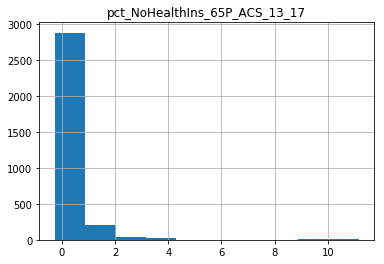

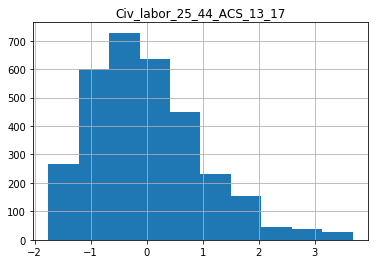

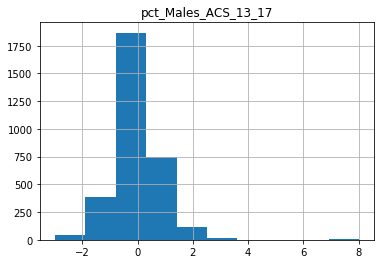

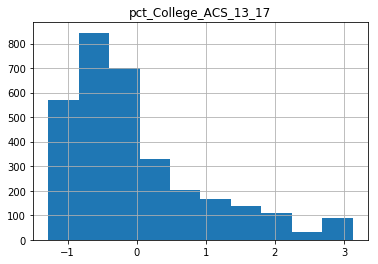

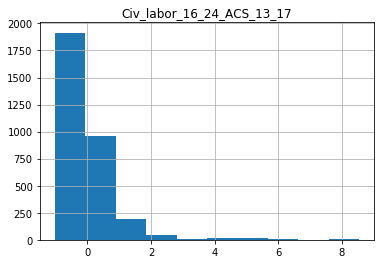

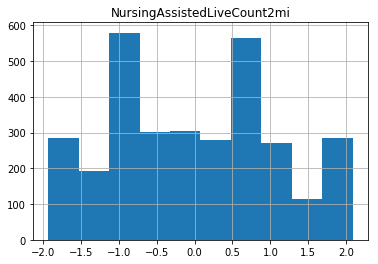

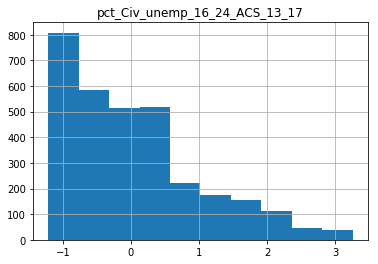

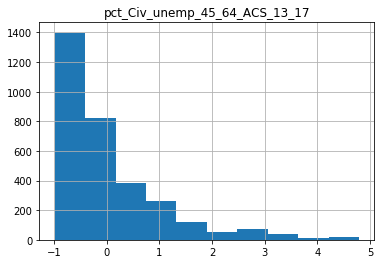

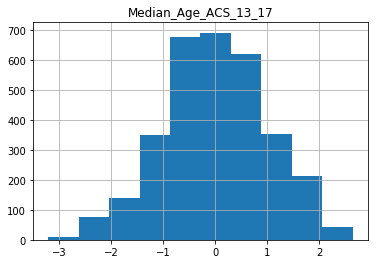

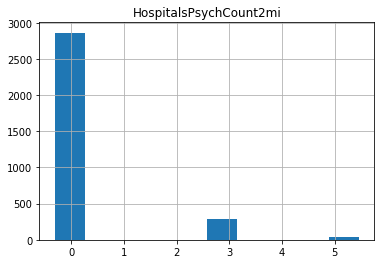

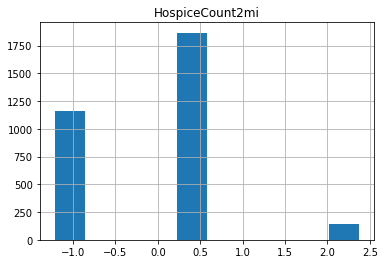

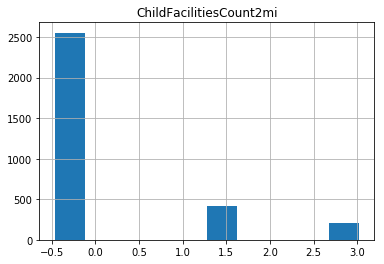

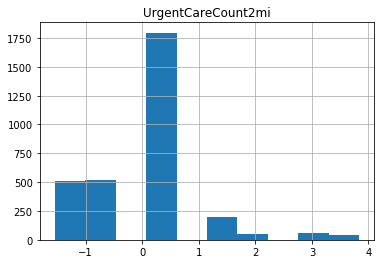

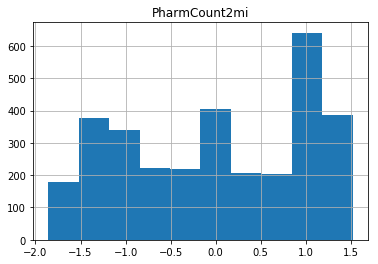

In [104]:
for column in X_train.columns:
    X_train.hist(column)

In [105]:
poisson_predictions = res.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
predictions_summary_frame.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper
1,0.676356,0.039984,0.602359,0.759443
6,0.663359,0.045946,0.579151,0.759811
20,0.662343,0.028600,0.608595,0.720838
25,0.662343,0.028600,0.608595,0.720838
33,0.687308,0.032490,0.626490,0.754030


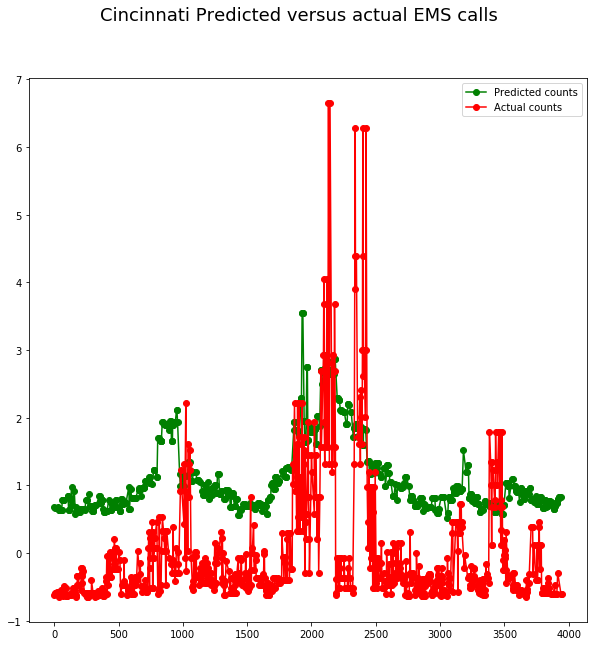

<Figure size 432x288 with 0 Axes>

In [117]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test
fig = plt.figure(figsize=(10,10))
fig.suptitle('Cincinnati Predicted versus actual EMS calls', size=18)
predicted, = plt.plot(predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()
plt.savefig('Cincy_EMS_poisson')

Text(0, 0.5, 'cumulative explained variance')

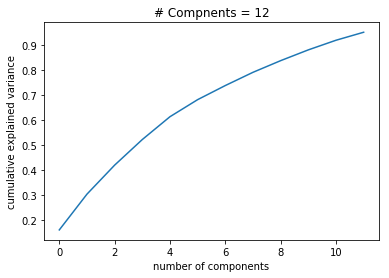

In [152]:
X, y = cin_gdf_standard, cin_gdf_standard.ems_call
X.drop('ems_call', inplace=True, axis=1)
X=X[['pct_NoHealthIns_65P_ACS_13_17','Civ_labor_25_44_ACS_13_17','pct_Males_ACS_13_17','pct_College_ACS_13_17','Civ_labor_16_24_ACS_13_17','NursingAssistedLiveCount2mi','pct_Civ_unemp_16_24_ACS_13_17','pct_Civ_unemp_45_64_ACS_13_17','Median_Age_ACS_13_17','HospitalsPsychCount2mi','HospiceCount2mi','ChildFacilitiesCount2mi','UrgentCareCount2mi','PharmCount2mi']]
#X_train['ems_call']=y_train
pca = PCA(.95)
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("# Compnents = " + str(pca.n_components_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [154]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
#X = pca.transform(X)

ValueError: operands could not be broadcast together with shapes (3124,12) (14,) 

In [155]:
res = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
res.summary()
#x6, x9, x11 and x12

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               ems_call   No. Observations:                 3124
Model:                            GLM   Df Residuals:                     3112
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4263.1
Date:                Sun, 23 Feb 2020   Deviance:                       76856.
Time:                        21:25:30   Pearson chi2:                 5.36e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0595      0.012     -5.065      0.000      -0.083      -0.036
x2             0.2060      0.012     17.343      0.000       0.183       0.229
x3             0.1409      0.014     10.037      0.000       0.113       0.168
x4            -0.1387      0.014     -9.784      0.000      -0.167      -0.111
x5            -0.1222      0.018     -6.902      0.000      -0.157      -0.088
x6             0.0238      0.017      1.441      0.150      -0.009       0.056
x7            -0.0594      0.019     -3.196      0.001      -0.096      -0.023
x8             0.0363      0.019      1.914      0.056      -0.001       0.073
x9             0.0563      0.021      2.679      0.007       0.015       0.097
x10           -0.0579      0.022     -2.663      0.008      -0.100      -0.015
x11            0.0030      0.025      0.120      0.905      -0.046       0.052
x12            0.0400      0.025      1.603      0.109      -0.009       0.089
==============================================================================
"""

In [139]:
#X, y = cin_gdf_standard, cin_gdf_standard.ems_call
#X.drop('ems_call', inplace=True, axis=1)

AttributeError: 'DataFrame' object has no attribute 'ems_call'

In [156]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_ratio_)


loadings = pd.DataFrame(loadings)



for i in range(len(loadings.columns)):
    loadings.rename(columns={loadings.columns[i]: "X"+str(i+1)}, inplace=True)

loadings.set_index(X.columns, inplace=True)


important_features = loadings.filter(['X6', 'X8', 'X11', 'X12'])

X6 = important_features.X6.sort_values(ascending=False)[0:12]
X6

pct_NoHealthIns_65P_ACS_13_17    0.188092
Median_Age_ACS_13_17             0.055833
NursingAssistedLiveCount2mi      0.025189
PharmCount2mi                    0.017652
Civ_labor_16_24_ACS_13_17        0.014062
HospiceCount2mi                  0.007035
ChildFacilitiesCount2mi          0.003696
HospitalsPsychCount2mi           0.000439
UrgentCareCount2mi              -0.014604
pct_Civ_unemp_16_24_ACS_13_17   -0.014731
pct_Males_ACS_13_17             -0.035014
Civ_labor_25_44_ACS_13_17       -0.057489
Name: X6, dtype: float64

In [157]:
X8 = important_features.X8.sort_values(ascending=False)[0:12]
X8

pct_Males_ACS_13_17              0.159438
Median_Age_ACS_13_17             0.071583
Civ_labor_16_24_ACS_13_17        0.066586
Civ_labor_25_44_ACS_13_17        0.055450
pct_Civ_unemp_16_24_ACS_13_17    0.033347
HospitalsPsychCount2mi           0.032341
HospiceCount2mi                  0.007498
NursingAssistedLiveCount2mi      0.002024
pct_Civ_unemp_45_64_ACS_13_17   -0.001333
PharmCount2mi                   -0.005430
UrgentCareCount2mi              -0.021894
pct_NoHealthIns_65P_ACS_13_17   -0.028917
Name: X8, dtype: float64

In [158]:
X11 = important_features.X11.sort_values(ascending=False)[0:12]
X11

UrgentCareCount2mi               0.097818
ChildFacilitiesCount2mi          0.058289
HospitalsPsychCount2mi           0.049729
pct_Males_ACS_13_17              0.041064
pct_NoHealthIns_65P_ACS_13_17   -0.003691
NursingAssistedLiveCount2mi     -0.018283
pct_Civ_unemp_45_64_ACS_13_17   -0.022603
Civ_labor_25_44_ACS_13_17       -0.024398
pct_Civ_unemp_16_24_ACS_13_17   -0.026500
Civ_labor_16_24_ACS_13_17       -0.030476
pct_College_ACS_13_17           -0.038039
Median_Age_ACS_13_17            -0.041193
Name: X11, dtype: float64

In [159]:
X12 = important_features.X12.sort_values(ascending=False)[0:12]
X12

ChildFacilitiesCount2mi          0.082149
Civ_labor_16_24_ACS_13_17        0.075313
NursingAssistedLiveCount2mi      0.075020
Median_Age_ACS_13_17             0.057052
pct_College_ACS_13_17            0.049477
pct_Civ_unemp_16_24_ACS_13_17    0.035492
pct_Civ_unemp_45_64_ACS_13_17    0.018872
HospitalsPsychCount2mi           0.017656
pct_Males_ACS_13_17             -0.001269
HospiceCount2mi                 -0.003574
UrgentCareCount2mi              -0.004851
pct_NoHealthIns_65P_ACS_13_17   -0.009815
Name: X12, dtype: float64